In [2]:
# Basic Python utilities
import re
import time

# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display

# Natural Language Processing
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Scikit-learn preprocessing and pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Scikit-learn models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Scikit-learn metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score
)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer



In [3]:


# Read the CSV file containing fake news data
# Only specific columns are loaded to optimize memory usage
# low_memory=False prevents mixed data type inference warnings
df_fake = pd.read_csv('/Users/uday.kemburu/Downloads/archive (3)/Fake.csv',
                 usecols=['title', 'text', 'subject', 'date', 'TRUE'],
                 low_memory=False)

# Print basic information about the dataset
# This section helps understand the size and structure of the data
print("\nDataset Information:Fake News")
print("=" * 50)  # Print a separator line for better readability
print(f"Number of rows: {len(df_fake)}")  # Total number of news articles
print(f"Number of columns: {len(df_fake.columns)}")  # Total number of features

# Display each column name and its corresponding data type
# This helps identify potential data type issues or mismatches
print("\nColumns in dataset:")
for col in df_fake.columns:
    print(f"- {col}: {df_fake[col].dtype}")

# Analyze the length of news articles
# Calculate character count for each article in the 'text' column
text_lengths = df_fake['text'].str.len()

# Calculate average and median text lengths
# This helps understand the typical size of news articles in the dataset
mean_length = text_lengths.mean()
median_length = text_lengths.median()

# Display text length statistics
print("\nText Length Statistics:")
print("=" * 50)
print(f"Mean text length: {mean_length:.2f} characters")  # Average article length
print(f"Median text length: {median_length:.2f} characters")  # Middle value of article lengths

# Show the first 5 rows of the dataset
# This gives a quick preview of what the data looks like
print("\nFirst few rows of the dataset:")
print("=" * 50)
display(df_fake.head())  # Using display() function, typically used in Jupyter notebooks


Dataset Information:Fake News
Number of rows: 23502
Number of columns: 5

Columns in dataset:
- title: object
- text: object
- subject: object
- date: object
- TRUE: object

Text Length Statistics:
Mean text length: 2537.06 characters
Median text length: 2165.00 characters

First few rows of the dataset:


,title,text,subject,date,TRUE
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,No
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,No
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,No
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,No
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,No


In [12]:
# Read the CSV file containing real (true) news data
# The usecols parameter specifies which columns to load, reducing memory usage
# low_memory=False prevents data type inference warnings
df_real = pd.read_csv('/Users/uday.kemburu/Downloads/archive (3)/True.csv',
                 usecols=['title', 'text', 'subject', 'date', 'TRUE'],  
                 low_memory=False)

# Print basic dataset information for real news
# This helps understand the size and composition of the true news dataset
print("\nDataset Information:Real News")
print("=" * 50)  # Separator line for better readability
print(f"Number of rows: {len(df_real)}")  # Total count of real news articles
print(f"Number of columns: {len(df_real.columns)}")  # Number of features/attributes

# Iterate through columns to display their names and data types
# This helps identify how pandas interpreted each column's data
print("\nColumns in dataset:")
for col in df_real.columns:
    print(f"- {col}: {df_real[col].dtype}")

# Analyze the length of real news articles
# str.len() counts the number of characters in each article's text
text_lengths = df_real['text'].str.len()

# Calculate descriptive statistics for article lengths
# This helps understand the typical size of real news articles
mean_length = text_lengths.mean()  # Average length of articles
median_length = text_lengths.median()  # Middle value of article lengths

# Display the calculated text length statistics
print("\nText Length Statistics:")
print("=" * 50)
print(f"Mean text length: {mean_length:.2f} characters")  # Average article length
print(f"Median text length: {median_length:.2f} characters")  # Median article length

# Show a preview of the dataset by displaying the first 5 rows
# This gives a quick look at the actual content and structure
print("\nFirst few rows of the dataset:")
print("=" * 50)
display(df_real.head())  # display() is typically used in Jupyter notebooks


Dataset Information:Real News
Number of rows: 21417
Number of columns: 5

Columns in dataset:
- title: object
- text: object
- subject: object
- date: object
- TRUE: object

Text Length Statistics:
Mean text length: 2383.28 characters
Median text length: 2222.00 characters

First few rows of the dataset:


,title,text,subject,date,TRUE
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,Yes
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,Yes
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,Yes
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,Yes
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,Yes



Combined Dataset Info:
Total number of rows: 44919
Number of columns: 5

Columns in dataset: ['title', 'text', 'subject', 'date', 'TRUE']

Missing values in combined dataset:
title       0
text        0
subject    21
date       21
TRUE        0
dtype: int64

Sample of combined dataset:


,title,text,subject,date,TRUE
0,Porous Texas border fence foreshadows challeng...,"BROWNSVILLE, Texas (Reuters) - The rust-colore...",politicsNews,2-Dec-16,Yes
1,Trade in focus at hearing for Trump's nominee ...,WASHINGTON (Reuters) - U.S. senators stressed ...,worldnews,3-Oct-17,Yes
2,‘American Sniper’ Widow Gets Set Straight Aft...,"Taya Kyle, the widow of infamous American Sni...",News,8-Jan-16,No
3,Woman Gets Death Threats Just For Posting A P...,"After last week s election, Hillary supporters...",News,15-Nov-16,No
4,PNG says Australia responsible for hundreds of...,SYDNEY (Reuters) - Australia will not be allow...,worldnews,30-Oct-17,Yes


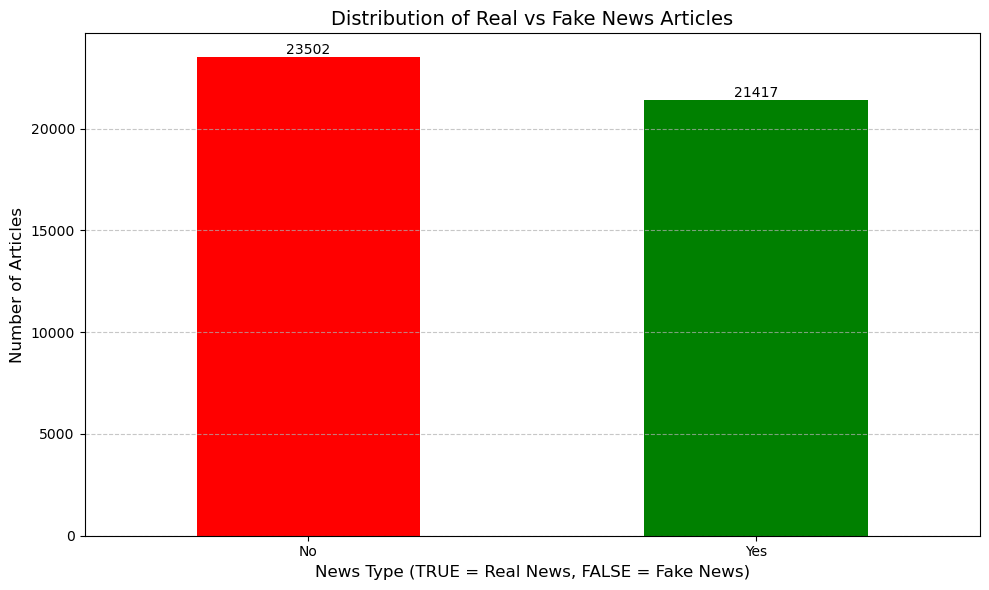

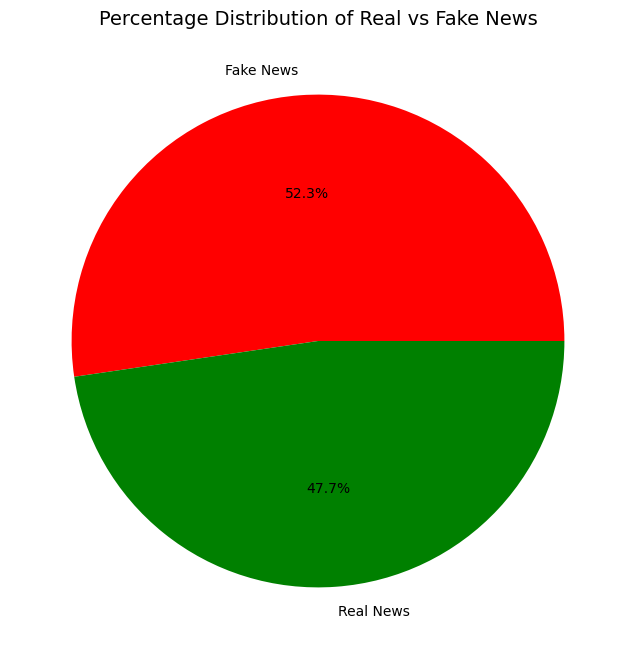

In [16]:
# Combine fake and real news datasets into a single dataframe
# axis=0 means concatenate vertically (stack rows)
# ignore_index=True creates new sequential index for combined dataset
df_combined = pd.concat([df_fake, df_real], axis=0, ignore_index=True)

# Randomly shuffle the dataset to ensure even distribution of fake/real news
# frac=1 means shuffle 100% of the dataset
# random_state=42 ensures reproducibility of the shuffle
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Display basic information about the combined dataset
print("\nCombined Dataset Info:")
print("=" * 50)
print(f"Total number of rows: {len(df_combined)}")  # Total number of articles
print(f"Number of columns: {len(df_combined.columns)}")  # Total number of features
print("\nColumns in dataset:", df_combined.columns.tolist())


# Check for missing values in each column
# This helps identify data quality issues
print("\nMissing values in combined dataset:")
print("=" * 50)
print(df_combined.isnull().sum())

# Display first few rows of the combined dataset
print("\nSample of combined dataset:")
print("=" * 50)
display(df_combined.head())

# Create a bar plot to visualize the distribution of real vs fake news
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Real vs Fake News Articles', fontsize=14)
plt.xlabel('News Type (TRUE = Real News, FALSE = Fake News)', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Create a pie chart to show percentage distribution
plt.figure(figsize=(8, 8))
plt.pie(percentage_dist, labels=['Fake News', 'Real News'], 
        autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Percentage Distribution of Real vs Fake News', fontsize=14)

# Display the plot
plt.show()

In [51]:
"""
Fake News Detection using Logistic Regression
-------------------------------------------
This script implements a baseline fake news detection model using Logistic Regression
with TF-IDF text vectorization. It processes text data, trains the model, and 
evaluates its performance on both training and test sets.

Key Components:
- Text vectorization using TF-IDF
- Logistic Regression classifier
- Performance metrics including accuracy and processing times
"""


# Prepare features (X) and target variable (y)
# X contains the text content of news articles
# y contains the binary labels (TRUE/FALSE)
X = df_combined['text']
y = df_combined['TRUE']

# Split data into training and test sets
# test_size=0.3 means 30% of data is used for testing
# stratify=y ensures balanced distribution of classes in both sets
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

# Create a pipeline that combines text preprocessing and classification
# Pipeline ensures consistent processing of training and test data
text_clf = Pipeline([
    # TF-IDF Vectorization step
    # stop_words='english' removes common English words
    # max_features=5000 limits vocabulary to top 5000 most frequent words
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    
    # Logistic Regression classifier
    # random_state ensures reproducible results
    ('clf', LogisticRegression(random_state=42))
])

# Train the model and measure training time
start_time = time.time()
text_clf.fit(X_train, y_train)
train_time = time.time() - start_time

# Measure prediction time on training data
start_time = time.time()
y_pred_train = text_clf.predict(X_train)
train_pred_time = time.time() - start_time

# Measure prediction time on test data
start_time = time.time()
y_pred_test = text_clf.predict(X_test)
test_pred_time = time.time() - start_time

# Calculate model accuracy on both training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Create a DataFrame to store and display performance metrics
results_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 
              'Test Accuracy', 
              'Training Time (seconds)', 
              'Train Prediction Time (seconds)', 
              'Test Prediction Time (seconds)'],
    'Score': [f"{train_accuracy:.4f}", 
              f"{test_accuracy:.4f}",
              f"{train_time:.2f}",
              f"{train_pred_time:.2f}",
              f"{test_pred_time:.2f}"]
})

# Display the performance metrics
print("\nLogisticRegression Model Performance Metrics:")
print("=" * 50)
print(results_df.to_string(index=False))


LogisticRegression Model Performance Metrics:
                         Metric  Score
                 Train Accuracy 0.9898
                  Test Accuracy 0.9865
        Training Time (seconds)   4.57
Train Prediction Time (seconds)   3.98
 Test Prediction Time (seconds)   1.71


Training SVM model...

SVM Model Performance Metrics:
                         Metric  Score
                 Train Accuracy 0.9967
                  Test Accuracy 0.9921
        Training Time (seconds) 149.10
Train Prediction Time (seconds)  74.46
 Test Prediction Time (seconds)  32.35


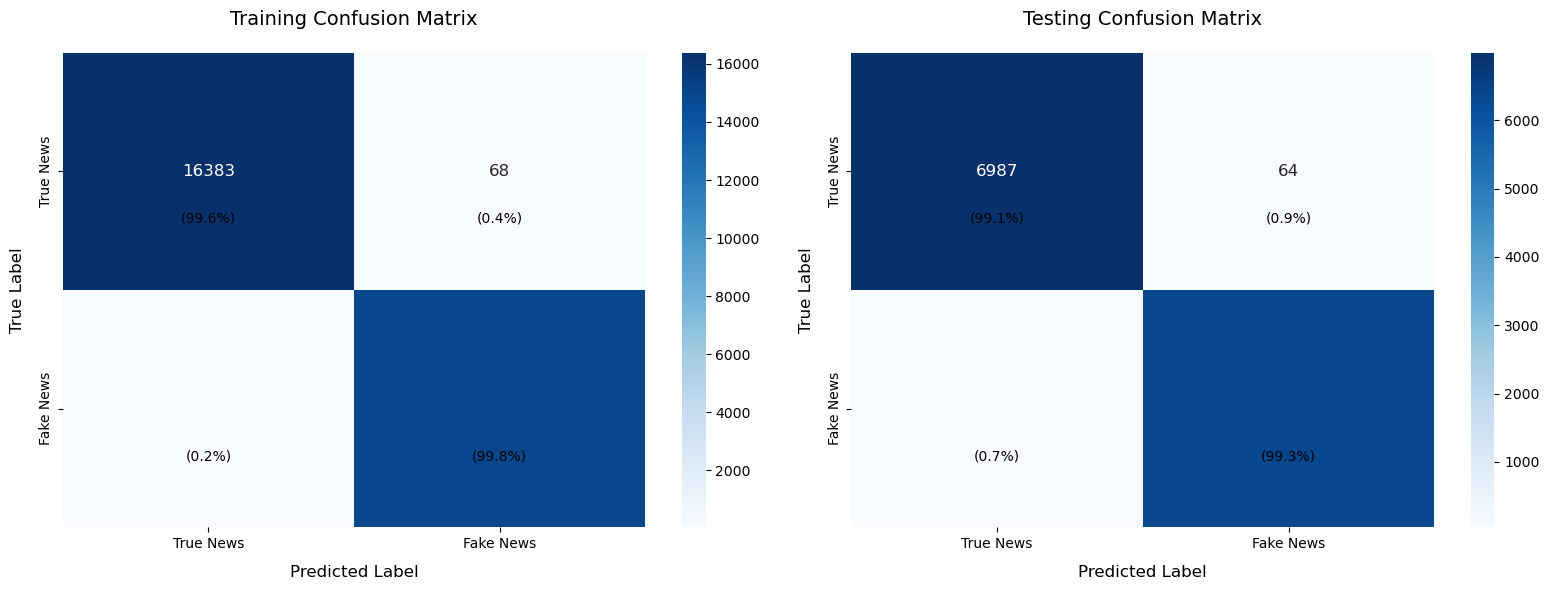

In [18]:
"""
Fake News Detection using Support Vector Machine (SVM)
---------------------------------------------------
This script implements a fake news detection model using Support Vector Machine
with TF-IDF text vectorization. It processes text data, trains the model,
evaluates performance metrics, and visualizes results using confusion matrices.

Key Components:
- Text vectorization using TF-IDF
- SVM classifier with linear kernel
- Performance metrics including accuracy and processing times
- Confusion matrix visualization for both training and test sets
"""


# Prepare features (X) and target variable (y)
X = df_combined['text']  # Text content for prediction
y = df_combined['TRUE']  # Binary labels (True/Fake news)

# Split data into training and test sets with stratification
# test_size=0.3: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=42,
                                                   stratify=y)

# Create pipeline combining TF-IDF vectorization and SVM classification
svm_pipeline = Pipeline([
   # TF-IDF vectorization with English stop words removal and vocabulary limitation
   ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
   # SVM classifier with linear kernel (suitable for high-dimensional text data)
   ('clf', SVC(kernel='linear', random_state=42))
])

# Train model and measure training time
print("Training SVM model...")
start_time = time.time()
svm_pipeline.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time on training data
start_time = time.time()
y_pred_train = svm_pipeline.predict(X_train)
train_pred_time = time.time() - start_time

# Measure prediction time on test data
start_time = time.time()
y_pred_test = svm_pipeline.predict(X_test)
test_pred_time = time.time() - start_time

# Calculate model accuracy on both sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Create DataFrame for performance metrics
results_df = pd.DataFrame({
   'Metric': ['Train Accuracy', 
              'Test Accuracy', 
              'Training Time (seconds)',
              'Train Prediction Time (seconds)',
              'Test Prediction Time (seconds)'],
   'Score': [f"{train_accuracy:.4f}", 
             f"{test_accuracy:.4f}",
             f"{training_time:.2f}",
             f"{train_pred_time:.2f}",
             f"{test_pred_time:.2f}"]
})

# Display performance metrics
print("\nSVM Model Performance Metrics:")
print("=" * 50)
print(results_df.to_string(index=False))

# Calculate confusion matrices for both sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Setup for visualization
class_labels = ['True News', 'Fake News']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create training set confusion matrix heatmap
sns.heatmap(cm_train, annot=True, fmt='d', ax=ax1, cmap='Blues',
           xticklabels=class_labels, yticklabels=class_labels,
           annot_kws={"size": 12})
ax1.set_title('Training Confusion Matrix', pad=20, size=14)
ax1.set_xlabel('Predicted Label', size=12, labelpad=10)
ax1.set_ylabel('True Label', size=12, labelpad=10)

# Add percentage labels to training matrix
for i in range(2):
   for j in range(2):
       percentage = cm_train[i, j] / cm_train[i].sum() * 100
       ax1.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
               ha='center', va='center', size=10)

# Create test set confusion matrix heatmap
sns.heatmap(cm_test, annot=True, fmt='d', ax=ax2, cmap='Blues',
           xticklabels=class_labels, yticklabels=class_labels,
           annot_kws={"size": 12})
ax2.set_title('Testing Confusion Matrix', pad=20, size=14)
ax2.set_xlabel('Predicted Label', size=12, labelpad=10)
ax2.set_ylabel('True Label', size=12, labelpad=10)

# Add percentage labels to test matrix
for i in range(2):
   for j in range(2):
       percentage = cm_test[i, j] / cm_test[i].sum() * 100
       ax2.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
               ha='center', va='center', size=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


Top Words Indicating Fake News (Negative Coefficients):


,word,coefficient,abs_coef
3656,read,-6.663556,6.663556
2513,just,-6.352248,6.352248
2265,image,-6.024960,6.024960
1776,featured,-5.961450,5.961450
2008,gop,-5.661979,5.661979
2979,mr,-5.200696,5.200696
940,com,-5.045609,5.045609
2167,hillary,-4.747851,4.747851
1979,getty,-4.481852,4.481852
4874,watch,-4.434091,4.434091



Top Words Indicating Real News (Positive Coefficients):


,word,coefficient,abs_coef
3859,reuters,31.378251,31.378251
3965,said,17.069621,17.069621
4870,washington,6.794822,6.794822
4895,wednesday,5.641620,5.641620
4677,tuesday,5.250900,5.250900
4566,thursday,5.152508,5.152508
3801,republican,5.114361,5.114361
3089,nov,4.765491,4.765491
1920,friday,4.602444,4.602444
2949,monday,4.146374,4.146374


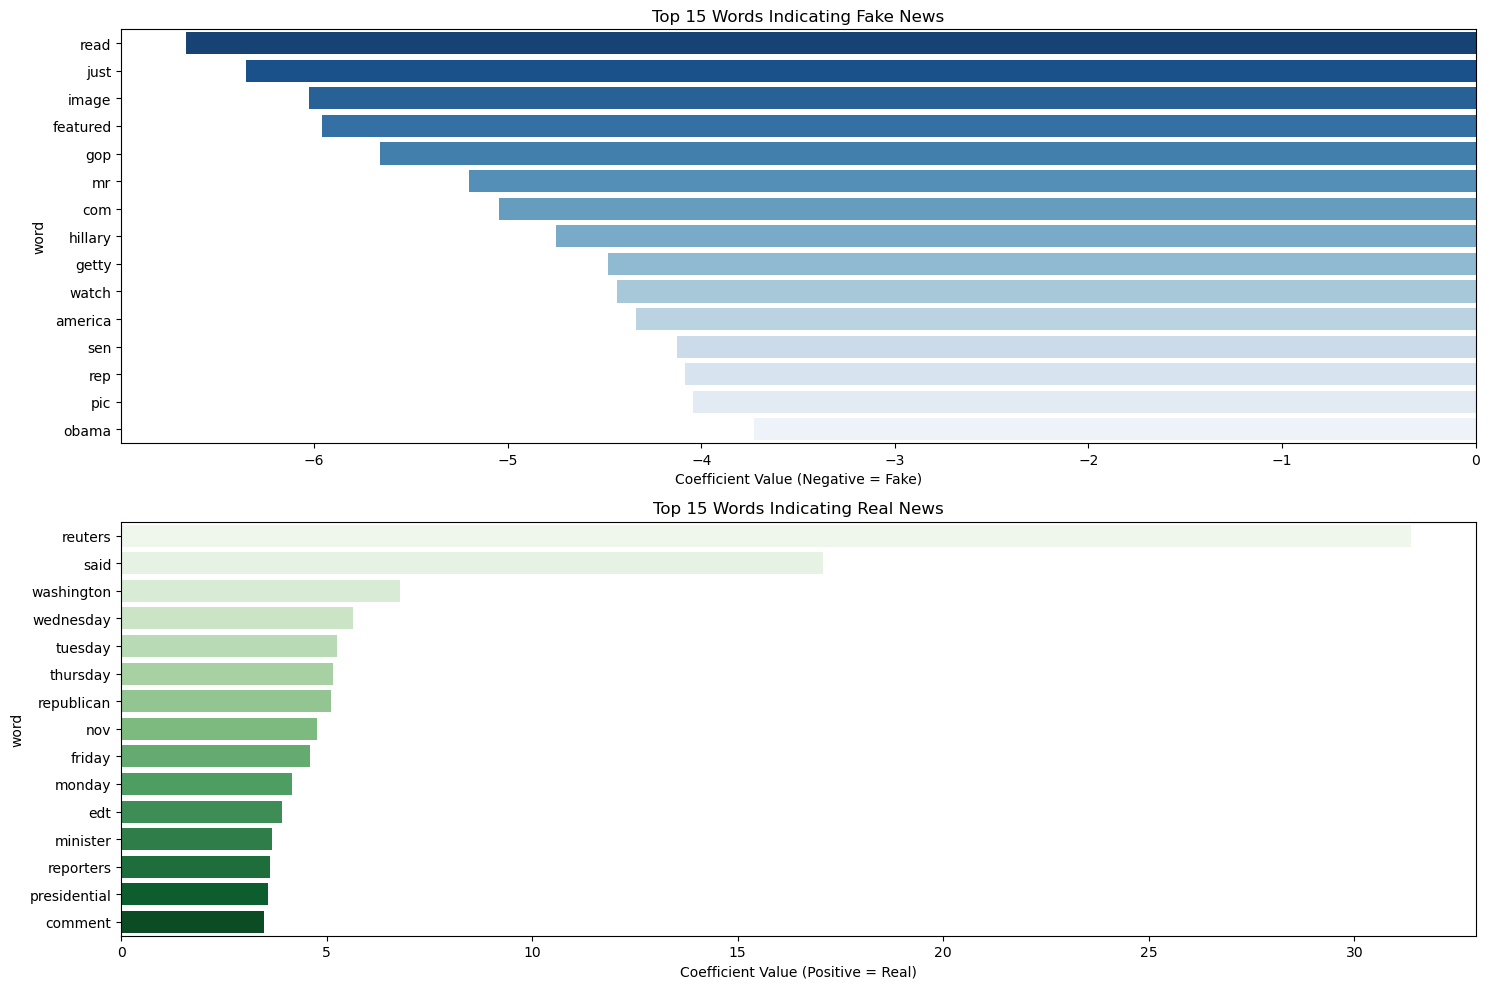

In [20]:
"""
Word Importance Analysis for Fake News Detection
----------------------------------------------
This script analyzes which words are most indicative of fake vs. real news 
using Logistic Regression coefficients with TF-IDF features. It identifies 
and visualizes the most influential words in determining news authenticity.

Key Components:
- TF-IDF vectorization of text data
- Logistic Regression coefficient analysis
- Visualization of most influential words
"""


# Create and fit TF-IDF vectorizer
# max_features=5000 limits to most frequent 5000 words
# stop_words removes common English words
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Get the vocabulary (feature names) from the vectorizer
feature_names = tfidf.get_feature_names_out()

# Train Logistic Regression model
# random_state ensures reproducible results
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_tfidf, y)

# Extract coefficients from the trained model
# Each coefficient represents the word's importance in classification
coefficients = lr_model.coef_[0]

# Create DataFrame containing words and their importance scores
word_importance_df = pd.DataFrame({
   'word': feature_names,
   'coefficient': coefficients
})

# Calculate absolute values for sorting
# This helps identify most influential words regardless of direction
word_importance_df['abs_coef'] = abs(word_importance_df['coefficient'])
word_importance_df = word_importance_df.sort_values('abs_coef', ascending=False)

# Display top indicators for fake news (negative coefficients)
print("\nTop Words Indicating Fake News (Negative Coefficients):")
print("=" * 50)
display(word_importance_df[word_importance_df['coefficient'] < 0].head(10))

# Display top indicators for real news (positive coefficients)
print("\nTop Words Indicating Real News (Positive Coefficients):")
print("=" * 50)
display(word_importance_df[word_importance_df['coefficient'] > 0].head(10))

# Create visualization of top influential words
plt.figure(figsize=(15, 10))

# Create subplot for fake news indicators
plt.subplot(2, 1, 1)
sns.barplot(x='coefficient', 
           y='word',
           data=word_importance_df[word_importance_df['coefficient'] < 0].head(15),
           palette='Blues_r')  # Blue color palette for fake news
plt.title('Top 15 Words Indicating Fake News')
plt.xlabel('Coefficient Value (Negative = Fake)')

# Create subplot for real news indicators
plt.subplot(2, 1, 2)
sns.barplot(x='coefficient', 
           y='word',
           data=word_importance_df[word_importance_df['coefficient'] > 0].head(15),
           palette='Greens')  # Green color palette for real news
plt.title('Top 15 Words Indicating Real News')
plt.xlabel('Coefficient Value (Positive = Real)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the visualization
plt.show()


Performing GridSearchCV for SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


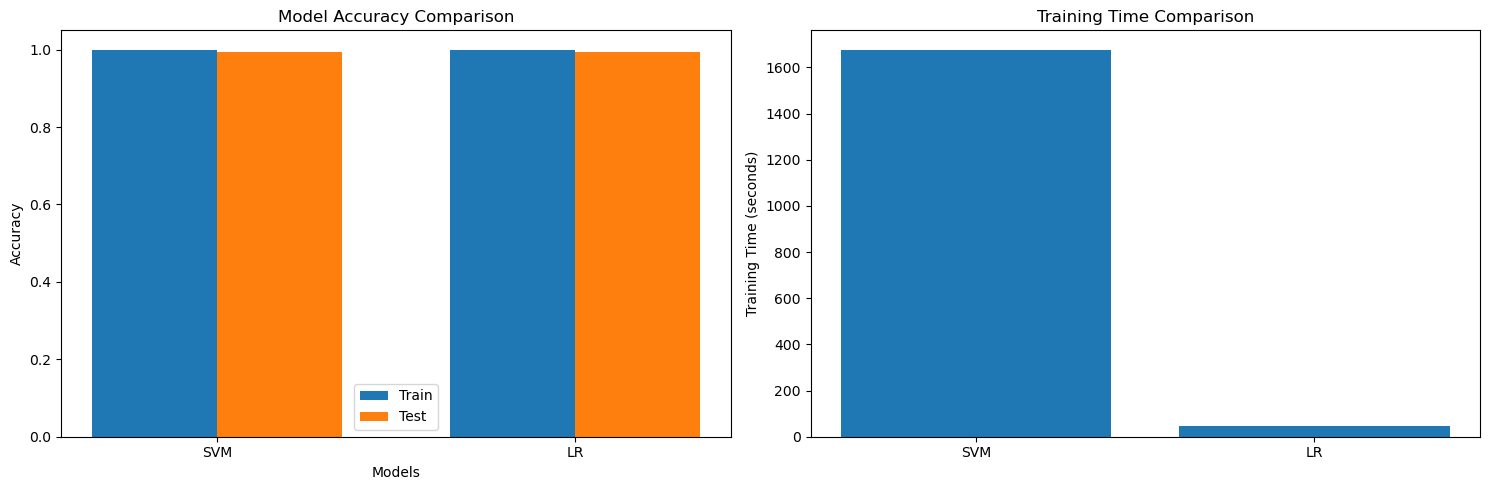


Detailed Results for SVM:
Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Best CV Score: 0.9910
Train Accuracy: 0.9992
Test Accuracy: 0.9927
Training Time: 1676.59 seconds

Detailed Results for Logistic Regression:
Best Parameters: {'classifier__C': 100, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best CV Score: 0.9924
Train Accuracy: 1.0000
Test Accuracy: 0.9932
Training Time: 44.59 seconds


In [39]:
"""
Hyperparameter Tuning for SVM and Logistic Regression
--------------------------------------------------
This script performs grid search cross-validation to find optimal hyperparameters
for both SVM and Logistic Regression models in fake news detection. It compares
their performance and visualizes the results.

Key Components:
- Grid search with cross-validation
- Performance comparison between models
- Visualization of accuracy and training time
"""



def perform_grid_search(model, param_grid, model_name):
   """
   Perform grid search cross-validation for model tuning.
   
   Parameters:
       model: sklearn classifier object
       param_grid: dictionary of parameters to search
       model_name: string name of the model
       
   Returns:
       dictionary containing results and metrics
   """
   # Create pipeline combining TF-IDF and classifier
   pipeline = Pipeline([
       ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
       ('classifier', model)
   ])
   
   # Modify parameter grid to match pipeline structure
   # Add 'classifier__' prefix to parameter names
   modified_param_grid = {f'classifier__{key}': value 
                         for key, value in param_grid.items()}
   
   # Initialize GridSearchCV with cross-validation
   grid_search = GridSearchCV(
       pipeline,
       param_grid=modified_param_grid,
       cv=5,  # 5-fold cross-validation
       n_jobs=-1,  # Use all available CPU cores
       verbose=1,
       scoring='accuracy',
       return_train_score=True
   )
   
   # Measure training time
   start_time = time.time()
   print(f"\nPerforming GridSearchCV for {model_name}...")
   grid_search.fit(X_train, y_train)
   training_time = time.time() - start_time
   
   # Calculate performance metrics
   train_accuracy = grid_search.score(X_train, y_train)
   test_accuracy = grid_search.score(X_test, y_test)
   
   # Compile results
   results = {
       'model_name': model_name,
       'best_params': grid_search.best_params_,
       'best_score': grid_search.best_score_,
       'train_accuracy': train_accuracy,
       'test_accuracy': test_accuracy,
       'training_time': training_time,
       'cv_results': pd.DataFrame(grid_search.cv_results_)
   }
   
   return results

# Define hyperparameter grids for each model
param_grid_svm = {
   'C': [0.1, 1],  # Regularization parameter
   'kernel': ['linear', 'rbf']  # Kernel types to try
}

param_grid_lr = {
   'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
   'penalty': ['l2'],  # L2 regularization
   'solver': ['lbfgs'],  # Optimization algorithm
   'max_iter': [1000]  # Maximum iterations
}

# Perform grid search for both models
svm_results = perform_grid_search(
   SVC(random_state=42),
   param_grid_svm,
   "SVM"
)

lr_results = perform_grid_search(
   LogisticRegression(random_state=42),
   param_grid_lr,
   "Logistic Regression"
)

# Create summary DataFrame
results_df = pd.DataFrame({
   'Model': [svm_results['model_name'], lr_results['model_name']],
   'Best Parameters': [str(svm_results['best_params']), 
                      str(lr_results['best_params'])],
   'Best CV Score': [f"{svm_results['best_score']:.4f}", 
                    f"{lr_results['best_score']:.4f}"],
   'Train Accuracy': [f"{svm_results['train_accuracy']:.4f}", 
                     f"{lr_results['train_accuracy']:.4f}"],
   'Test Accuracy': [f"{svm_results['test_accuracy']:.4f}", 
                    f"{lr_results['test_accuracy']:.4f}"],
   'Training Time (s)': [f"{svm_results['training_time']:.2f}", 
                        f"{lr_results['training_time']:.2f}"]
})

# Create visualization of results
plt.figure(figsize=(15, 5))

# Plot accuracy comparison
plt.subplot(1, 2, 1)
x = np.arange(2)
width = 0.35

# Create grouped bar plot for accuracies
plt.bar(x - width/2, 
       [svm_results['train_accuracy'], lr_results['train_accuracy']], 
       width, label='Train')
plt.bar(x + width/2, 
       [svm_results['test_accuracy'], lr_results['test_accuracy']], 
       width, label='Test')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, ['SVM', 'LR'])
plt.legend()

# Plot training time comparison
plt.subplot(1, 2, 2)
plt.bar(['SVM', 'LR'], 
       [svm_results['training_time'], lr_results['training_time']])
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')

plt.tight_layout()
plt.show()

def print_detailed_results(results):
   """
   Print detailed analysis of model performance
   """
   print(f"\nDetailed Results for {results['model_name']}:")
   print("=" * 50)
   print(f"Best Parameters: {results['best_params']}")
   print(f"Best CV Score: {results['best_score']:.4f}")
   print(f"Train Accuracy: {results['train_accuracy']:.4f}")
   print(f"Test Accuracy: {results['test_accuracy']:.4f}")
   print(f"Training Time: {results['training_time']:.2f} seconds")

# Print detailed analysis for both models
print_detailed_results(svm_results)
print_detailed_results(lr_results)

In [2]:
# lemmatizing and TfidfVectorizer

In [47]:
"""
Text Preprocessing and Model Comparison with Lemmatization
------------------------------------------------------
This script performs advanced text preprocessing using lemmatization and
compares multiple classification models (Logistic Regression, Decision Tree,
Naive Bayes) with hyperparameter tuning for fake news detection.

Key Components:
- Text lemmatization with POS tagging
- TF-IDF vectorization
- Multiple model comparison
- Grid search for hyperparameter optimization
"""


# Download required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

def get_wordnet_pos(word):
   """
   Map POS tag to first character that lemmatize() accepts.
   
   Args:
       word (str): Word to determine POS tag for
       
   Returns:
       wordnet POS tag
   """
   tag = nltk.pos_tag([word])[0][1][0].upper()
   tag_dict = {
       "J": wordnet.ADJ,
       "N": wordnet.NOUN,
       "V": wordnet.VERB,
       "R": wordnet.ADV
   }
   return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(text):
   """
   Clean text by removing special characters and converting to lowercase.
   
   Args:
       text (str): Raw text to clean
       
   Returns:
       str: Cleaned text
   """
   text = str(text)
   text = re.sub(r'[^a-zA-Z\s]', '', text)
   return text.lower()

def lemmatize_text(text):
   """
   Lemmatize text while considering POS tags.
   
   Args:
       text (str): Text to lemmatize
       
   Returns:
       str: Lemmatized text
   """
   lemmatizer = WordNetLemmatizer()
   text = preprocess_text(text)
   words = word_tokenize(text)
   lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
   return ' '.join(lemmatized_words)

# Configure pandas display settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Perform text lemmatization
print("Lemmatizing text data...")
start_time = time.time()
df_lemmatized = df_combined.copy()
df_lemmatized['lemmatized_text'] = df_combined['text'].apply(lemmatize_text)
lemmatization_time = time.time() - start_time
print(f"Lemmatization completed in {lemmatization_time:.2f} seconds")

# Prepare data for modeling
X = df_lemmatized['lemmatized_text']
y = df_lemmatized['TRUE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define pipelines with TF-IDF vectorization
pipelines = {
   'Logistic': Pipeline([
       ('tfidf', TfidfVectorizer(stop_words='english')),
       ('classifier', LogisticRegression(max_iter=1000))
   ]),
   
   'Decision Tree': Pipeline([
       ('tfidf', TfidfVectorizer(stop_words='english')),
       ('classifier', DecisionTreeClassifier())
   ]),
   
   'Bayes': Pipeline([
       ('tfidf', TfidfVectorizer(stop_words='english')),
       ('classifier', MultinomialNB())
   ])
}

# Define hyperparameter search grids
param_grids = {
   'Logistic': {
       'tfidf__max_features': [1000, 2000],  # Vocabulary size
       'tfidf__min_df': [2],  # Minimum document frequency
       'tfidf__max_df': [0.9],  # Maximum document frequency
       'tfidf__ngram_range': [(1, 1)],  # Use unigrams
       'classifier__C': [0.01, 0.1, 1.0],  # Inverse regularization
       'classifier__penalty': ['l2'],  # L2 regularization
       'classifier__solver': ['lbfgs', 'newton-cg']  # Optimization algorithm
   },
   
   'Decision Tree': {
       'tfidf__max_features': [1000, 2000],
       'tfidf__min_df': [2],
       'tfidf__max_df': [0.9],
       'tfidf__ngram_range': [(1, 1)],
       'classifier__max_depth': [3, 5, 7, 10],  # Tree depth
       'classifier__min_samples_split': [5, 10],  # Minimum samples for split
       'classifier__min_samples_leaf': [2, 4]  # Minimum samples in leaf
   },
   
   'Bayes': {
       'tfidf__max_features': [1000, 2000],
       'tfidf__min_df': [2],
       'tfidf__max_df': [0.9],
       'tfidf__ngram_range': [(1, 1)],
       'classifier__alpha': [0.1, 0.5, 1.0]  # Smoothing parameter
   }
}

# Store results for each model
results = {}

# Perform grid search for each model
for name, pipeline in pipelines.items():
   print(f"\nTuning {name}...")
   start_time = time.time()
   
   # Initialize and run grid search
   grid_search = GridSearchCV(
       pipeline,
       param_grids[name],
       cv=5,  # 5-fold cross-validation
       n_jobs=-1,  # Use all available CPU cores
       scoring='accuracy',
       verbose=1
   )
   
   grid_search.fit(X_train, y_train)
   training_time = time.time() - start_time
   
   # Store results
   results[name] = {
       'best_params': grid_search.best_params_,
       'best_score': grid_search.best_score_,
       'training_time': training_time
   }

# Print best parameters for each model
print("\nBest Parameters for each model:")
print("=" * 50)
for model in ['Logistic', 'Decision Tree', 'Bayes']:
   print(f"\n{model}:")
   for param, value in results[model]['best_params'].items():
       print(f"    {param}: {value}")

# Create summary DataFrame
results_df = pd.DataFrame({
   'Model': ['Logistic', 'Decision Tree', 'Bayes'],
   'Best Score': [results[model]['best_score'] for model in ['Logistic', 'Decision Tree', 'Bayes']],
   'Training Time (seconds)': [results[model]['training_time'] for model in ['Logistic', 'Decision Tree', 'Bayes']]
})

# Format results
results_df.set_index('Model', inplace=True)
results_df['Best Score'] = results_df['Best Score'].apply(lambda x: f"{x:.4f}")
results_df['Training Time (seconds)'] = results_df['Training Time (seconds)'].apply(lambda x: f"{x:.2f}")

# Display final results
print("\nResults Summary:")
print("=" * 50)
print(results_df)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/uday.kemburu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/uday.kemburu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/uday.kemburu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/uday.kemburu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Lemmatizing text data...
Lemmatization completed in 672.52 seconds

Tuning Logistic...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Tuning Decision Tree...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Tuning Bayes...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Parameters for each model:

Logistic:
    classifier__C: 1.0
    classifier__penalty: l2
    classifier__solver: lbfgs
    tfidf__max_df: 0.9
    tfidf__max_features: 2000
    tfidf__min_df: 2
    tfidf__ngram_range: (1, 1)

Decision Tree:
    classifier__max_depth: 3
    classifier__min_samples_leaf: 2
    classifier__min_samples_split: 10
    tfidf__max_df: 0.9
    tfidf__max_features: 2000
    tfidf__min_df: 2
    tfidf__ngram_range: (1, 1)

Bayes:
    classifier__alpha: 0.1
    tfidf__max_df: 0.9
    tfidf__max_features: 2000
    tfidf__min_df: 2
    tfidf__ngram_range: (1, 1)

Results Summary:
              Best Score Training Time (seconds)
Model                      